In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Preprocess the data, mark zero values as NaN and drop
import numpy as np
#for columns where 0 makes no sense
columns = ['glucose', 'bp', 'skin', 'insulin', 'bmi']

for col in columns:
    pima[col].replace(0, np.NaN, inplace=True)
    
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Drop rows with missing values
pima.dropna(inplace=True)

# summarize the number of rows and columns in df
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#split dataset in features(or independent variable) and target variable(or dependent variable)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[50,  4],
       [13, 12]])

Text(0.5, 257.44, 'Predicted label')

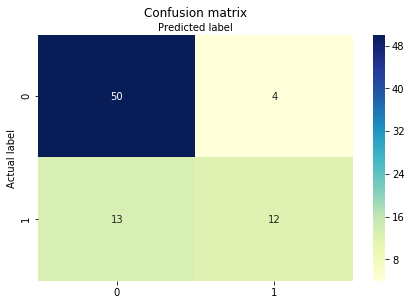

In [10]:
import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
rating_LR=logreg.predict(pima[feature_cols].iloc[0].values.reshape(1,-1)) 

print(rating_LR)

print(pima['label'].iloc[0])


rating_LR=logreg.predict(pima[feature_cols].iloc[44].values.reshape(1,-1))

print(rating_LR)

print(pima['label'].iloc[44])


rating_LR=logreg.predict(pima[feature_cols].iloc[1].values.reshape(1,-1)) 

print(rating_LR)

print(pima['label'].iloc[1])


[0]
0
[0]
1
[1]
1


In [12]:
print(pima.describe())
print(pima[feature_cols].iloc[0].values.shape)#column vector
print(pima[feature_cols].iloc[0].values)


print(pima[feature_cols].iloc[0].values.reshape(1,-1).shape)#row vector


         pregnant     glucose          bp        skin     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         pedigree         age       label  
count  392.000000  392.000000  392.000000  
mean     0.523046   30.864796    0.331633  
std      0.345488   10.200777    0.471401  
min      0.085000   21.000000    0.000000  
25%      0.269750   23.000000    0.000000  
50%   

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7848101265822784
Precision: 0.75
Recall: 0.48


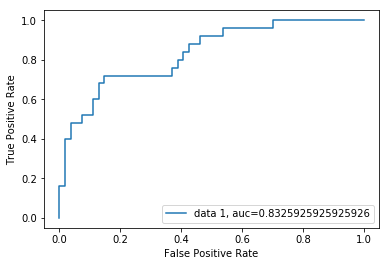

In [14]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()